In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from math import sqrt

x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

y = [59, 56, 53, 54, 60, 67, 72, 74, 75, 74, 70, 65, 61]

In [2]:
#Newton’s Divided difference, produces coefficients of interpolating polynomial
def coef(x,y):
    n = len(x)
    a = np.zeros((n,n+1))
    a[:,0]= x
    a[:,1]= y
#Find the divided differences
    for j in range(2,n+1):
        for i in range(j-1,n):
            a[i,j] = (a[i,j-1]-a[i-1,j-1]) / (a[i,0]-a[i-j+1,0])
#Copy diagonal elements into array for returning
    p = np.zeros(n)
    for k in range(0,n):
        p[k] = a[k,k+1]
    return p

#Evaluate polynomial at a given point
def newton_method(t,x,p):
    n = len(x)
    result = p[n-1]
    for i in range(n-2,-1,-1):
        result = result*(t-x[i]) + p[i]
    return result

In [3]:
#Note: S(x) = S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3 for x_j <= x <= x_j+1
#INPUT n; x_0, x_1, ..., x_n; a_0 = f(x_0), a_1 = f(x_n)
def nat_cubic_spline(x, y):
    
    n= len(x)
    h = []
    alpha = []
    l = []
    u = []
    z = []
    
    c = [0] * len(y)
    b = [0] * len(y)
    d = [0] * len(y)
    
#STEP1 For i = 0, 1, ..., n - 1 set h_i = x_i+1 - x_i
    for i in range(0, n - 1):
        h.append(x[i + 1] - x[i])
#STEP2 For i = 1 2, ..., n - 1 set
    #a_i = (3/h_i)(a_i+1 - a_i) - (3/h_i-1)(a_i - a_i-1)
    for i in range (1, n - 1):
        alpha.append((3/h[i]) * (y[i + 1] - y[i]) - (3/h[i-1]) * (y[i] - y[i-1]))
#STEP3 Set l_0 = 1;
    # u_0 = 0;
    # z_0 = 0;
    l.append(1)
    u.append(0)
    z.append(0)
#STEP4 For i = 1, 2, ..., n - 1
    #Set l_i = 2(x_i+1 - x_i-1) - h_i-1 * u_i-1
    #u_i = h_i / l_i;
    #z_i = (a_i - h_i-1 * z_i-1)/l_i
    i = 1
    for i in range(1,n - 1):
        l.append((2 * (x[i+1] - x[i-1])) - h[i-1] * u[i-1])
        u.append(h[i] / l[i])
        z.append((alpha[i - 1] - (h[i-1] * z[i-1]))/l[i])
#STEP5 Set l_n = 1;
    #z_n = 0;
    #c_n = 0
    l.append(1)
    z.append(0)
    c[n-1] = 0
#STEP6 For j = n-1, n-2, ..., 0
    # set c_j = z_j - u_j * c_j+1;
    # b_j = (a_j+1 - a_j)/h_j - h_j(c_j+1 + 2c_j)/3;
    # d_j = (c_j+1 - c_j)/(3h_j).
    j = n - 1
    for j in range(n - 2, -1, -1):
        c[j] = z[j] - u[j] * c[j+1]
        b[j] = (y[j+1] - y[j])/(h[j]) - ((h[j])*(c[j+1] + 2*c[j])/3)
        d[j] = (c[j+1] - c[j])/(3*h[j])
#STEP7 OUTPUT (a_j, b_j, c_j, d_j for j = 0, 1, ..., n-1) STOP
    return y, b, c, d

def cubic(y,b,c,d,x,x0):
    n = len(x)
    for i in range(0, n):
        if(x0 > x[n - 1]):
            value = y[n - 1] + b[n-1]*(x0 - x[n-1]) + c[n - 1]*((x0 - x[n-1])**2) + d[n-1]*((x0 - x[n-1])**3)
        elif((x0 > x[i] and x0 < x[i+1]) or (x0 == x[i])):
            value  = y[i] + b[i]*(x0 - x[i]) + c[i]*((x0 - x[i])**2) + d[i]*((x0 - x[i])**3)
    return value

In [4]:
a,b,c,d = nat_cubic_spline(x, y)

## Question 01

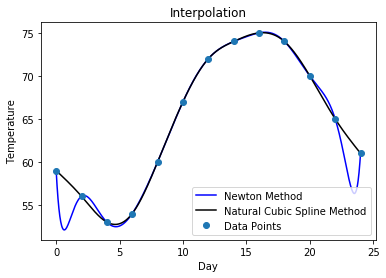

In [5]:
a = coef(x,y)
graphRange = np.linspace(min(x),max(x),1000)
yCubic = []
for i in graphRange:
    approx2 = (cubic(y,b,c,d,x,i))
    yCubic.append(approx2)
yval = newton_method(graphRange,x,a)
plt.plot(graphRange,yval,color='b',linestyle='-',label='Newton Method')
plt.plot(graphRange, yCubic,color='k',linestyle='-',label='Natural Cubic Spline Method')
plt.plot(x, y,'o',label='Data Points')
plt.title('Interpolation')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.show()

## Question 02

In [15]:
newton_method(11,x,a)

69.91312909126282

In [16]:
cubic(y,b,c,d,x,11)

69.881177404202

## Question 03

In [21]:
newton_method(25,x,a)

152.04890751838786

In [22]:
cubic(y,b,c,d,x,25)

61

## Question 04

In [23]:
newton_method(33,x,a)

452262.28604435915

In [24]:
cubic(y,b,c,d,x,33)

61

The cubic spline predicts the way it does because there is differentiability at the endpoints of the subintervals. This leads to a "smoother" interpolating function. It has no conditions imposed for the direction at its endpoints, so the curve takes the shape of a stright line after it passes through the the interpolation points nearest its endpoints.